In [3]:
import pickle

# print current working directory
import os
print('os.getcwd():', os.getcwd())

os.getcwd(): /root/workspace/VectorMapNet_code


In [4]:
with open('./work_dirs/vectormapnet_ld/results_nuscence.pkl', 'rb') as f:
    results = pickle.load(f)

results.keys()

dict_keys(['meta', 'results', 'groundTruth'])

In [5]:
results['meta']

{'use_camera': False,
 'use_lidar': True,
 'use_radar': False,
 'use_map': False,
 'use_external': False}

In [6]:
type(results['results'])
results['results'].keys()

dict_keys(['vectors'])

In [7]:
results.keys()
results['groundTruth'].keys()
results['groundTruth']['vectors']

[{'pts': array([[10.10050251,  2.57575758],
         [11.00502513,  0.15151515],
         [20.65326633,  3.48484848],
         [22.16080402,  2.27272727]]),
  'pts_num': 4,
  'type': 1,
  'confidence_level': 1.0},
 {'pts': array([[25.1758794 ,  1.66666667],
         [15.52763819,  8.33333333],
         [23.66834171, 14.09090909]]),
  'pts_num': 3,
  'type': 1,
  'confidence_level': 1.0},
 {'pts': array([[16.4321608 ,  8.63636364],
         [25.77889447,  2.27272727]]),
  'pts_num': 2,
  'type': 1,
  'confidence_level': 1.0},
 {'pts': array([[18.24120603,  9.24242424],
         [18.84422111,  8.93939394]]),
  'pts_num': 2,
  'type': 1,
  'confidence_level': 1.0},
 {'pts': array([[19.44723618,  8.33333333],
         [20.05025126,  8.03030303]]),
  'pts_num': 2,
  'type': 1,
  'confidence_level': 1.0},
 {'pts': array([[20.65326633,  7.42424242],
         [21.25628141,  7.12121212]]),
  'pts_num': 2,
  'type': 1,
  'confidence_level': 1.0},
 {'pts': array([[21.85929648,  6.81818182],
     

In [8]:
vectors = results['groundTruth']['vectors']
# print('vectors:', vectors)
print('len: ', len(vectors))
vectors[0].keys()


len:  35


dict_keys(['pts', 'pts_num', 'type', 'confidence_level'])

In [9]:
len(vectors[0]['pts'])

4

In [10]:
vectors[0]

{'pts': array([[10.10050251,  2.57575758],
        [11.00502513,  0.15151515],
        [20.65326633,  3.48484848],
        [22.16080402,  2.27272727]]),
 'pts_num': 4,
 'type': 1,
 'confidence_level': 1.0}

In [11]:
import matplotlib.pyplot as plt
import numpy as np

In [12]:
color_map = {
    0: 'r',
    1: 'g',
    2: 'b',
}

close_map = {
    0: True,
    1: False,
    2: False,
}

1.0


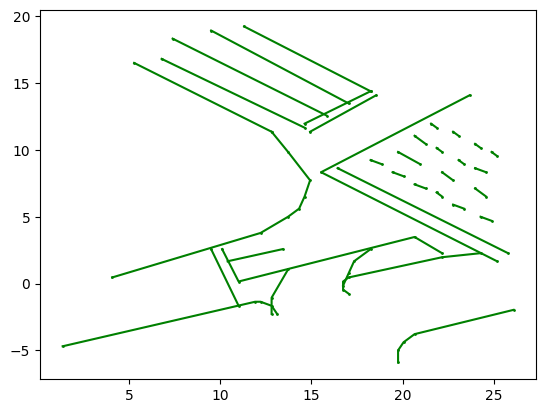

In [13]:
# plot a list of 2D points (x, y), the input is a ndarray of shape (N, 2)
# connect the points in the order of the list

def plot_points(points, color='b', marker='o', s=1, close = True):

    # points: ndarray of shape (N, 2)

    plt.scatter(points[:, 0], points[:, 1], c=color, marker=marker, s=s)
    plt.plot(points[:, 0], points[:, 1], c=color)

    # connect the first and last points
    if close:
        plt.plot([points[0][0], points[-1][0]], [points[0][1], points[-1][1]], c=color)

print(vectors[0]['confidence_level'])
for i in vectors:
    plot_points(i['pts'], color=color_map[i['type']], close=False)


plt.show()

In [14]:
results['groundTruth']
len(results['groundTruth'])

1

In [15]:
# plot a list of 2D points (x, y), the input is a ndarray of shape (N, 2)
# connect the points in the order of the list

def plot_points(points, color='b', marker='o', s=5, close = True):

    # points: ndarray of shape (N, 2)

    plt.scatter(points[:, 0], points[:, 1], c=color, marker=marker, s=s)
    plt.plot(points[:, 0], points[:, 1], c=color)

    # connect the first and last points
    if close:
        plt.plot([points[0][0], points[-1][0]], [points[0][1], points[-1][1]], c=color)

# plot two maps side by side
def plot_two_maps(v1, v2, seq = None):
    fig = plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    for i in v1:
        if i['confidence_level'] < 0.8:
            continue
        plot_points(i['pts'], color=color_map[i['type']], close=close_map[i['type']])
    plt.subplot(1, 2, 2)
    for i in v2:
        if i['confidence_level'] < 0.8:
            continue
        plot_points(i['pts'], color=color_map[i['type']], close=close_map[i['type']])
    plt.show()
    if seq is not None:
        plt.savefig('results_nuscence_' + str(seq) + '.png')

def plot_one_map(v):
    fig = plt.figure(figsize=(20, 10))
    for i in v:
        print(i['confidence_level'])
        if i['confidence_level'] < 0.8:
            continue
        plot_points(i['pts'], color=color_map[i['type']], close=close_map[i['type']])
    plt.show()
    plt.savefig('results_nuscence_test.png', dpi=fig.dpi)

    

# print(vectors[0])


# plot_points(vectors[0])

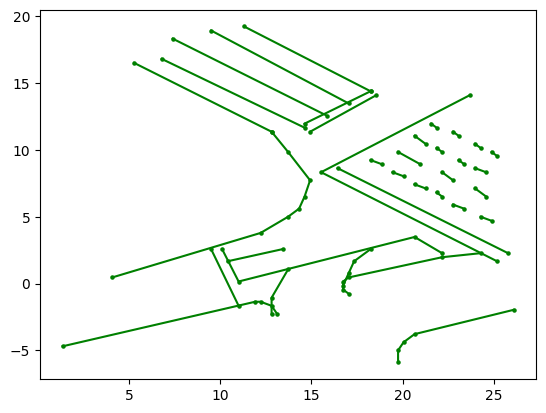

In [16]:

seq = 0
for i in results['groundTruth']['vectors']:
    # fig = plt.figure(figsize=(20, 10))
    plot_points(i['pts'], color=color_map[i['type']], close=close_map[i['type']])
    seq += 1


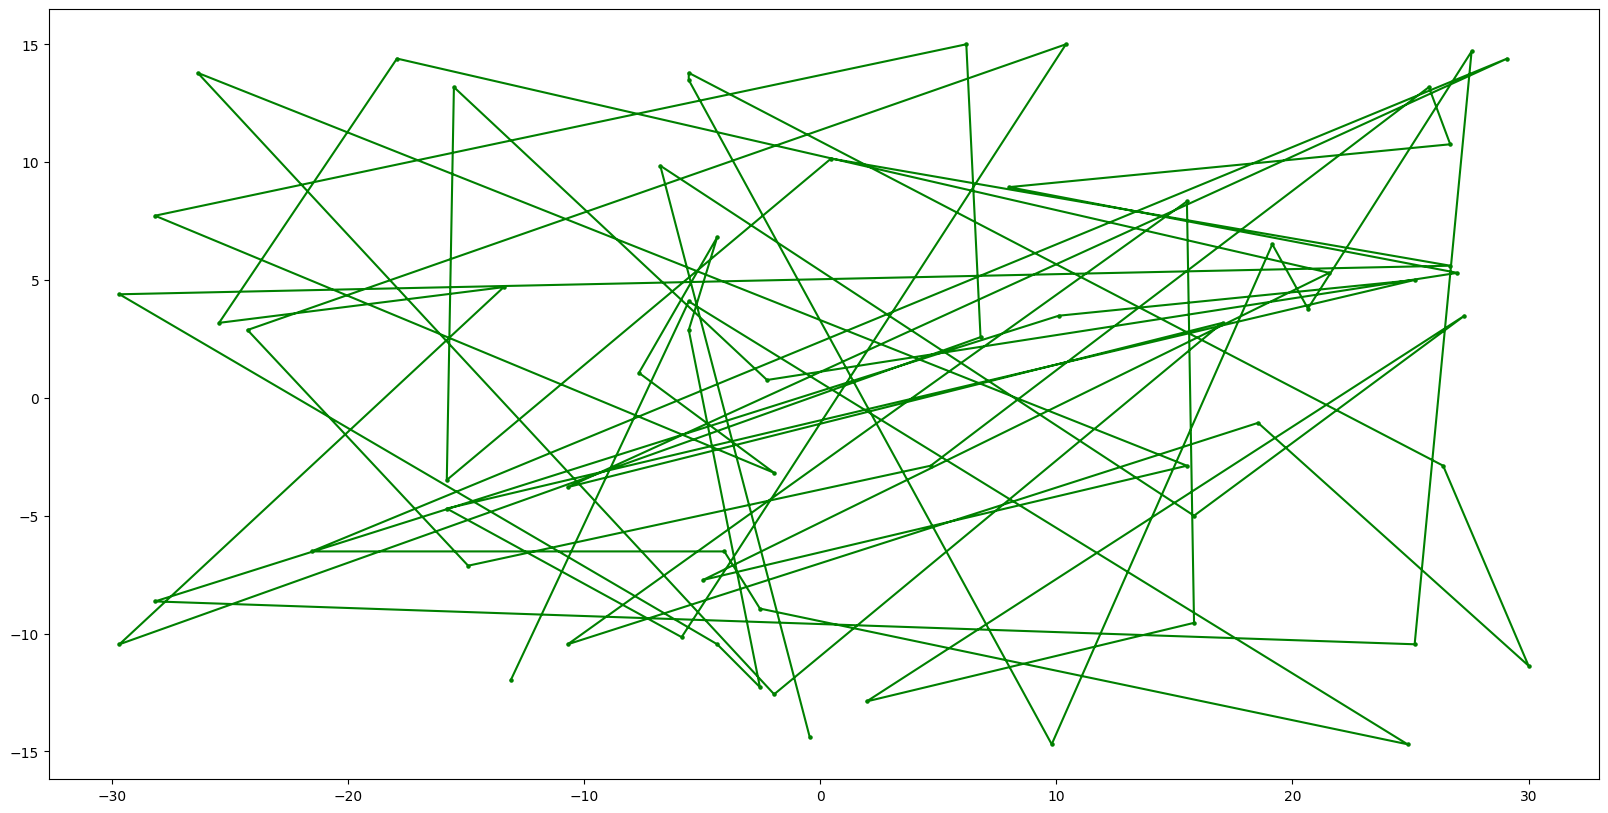

In [32]:

seq = 0
for i in results['results']['vectors']:
    if i['confidence_level'] < 0.61:
        continue
    # fig = plt.figure(figsize=(20, 10))
    plot_points(i['pts'], color=color_map[i['type']], close=close_map[i['type']])
    seq += 1

In [22]:
def plot_det_result():
    pass

results['results']['vectors'][1]

{'pts': array([[  3.76884422,  -8.33333333],
        [  7.38693467,  13.18181818],
        [ 17.93969849,  14.6969697 ],
        [  1.65829146,   6.51515152],
        [-13.71859296, -10.15151515],
        [-19.74874372, -13.48484848],
        [  9.1959799 ,  -1.66666667],
        [-23.66834171,   6.21212121],
        [ 25.47738693,  11.96969697],
        [-24.27135678,  -5.3030303 ],
        [ 28.49246231,  -7.12121212],
        [-29.39698492,   4.6969697 ],
        [  3.46733668,   3.48484848],
        [ 14.0201005 ,   5.3030303 ],
        [ 13.71859296,   9.84848485],
        [-19.74874372,  13.78787879],
        [ 14.92462312, -13.48484848],
        [-29.09547739,  -0.75757576],
        [-17.63819095,  -1.96969697],
        [-24.57286432,   4.39393939],
        [-22.7638191 ,   3.18181818],
        [-19.44723618,   5.3030303 ],
        [ -0.75376884,  -2.27272727],
        [-20.95477387,  -7.12121212],
        [-18.84422111,  13.78787879],
        [ 18.84422111,   0.45454545],
     